# _Sağlık Sigortası Harcamalarını Tahmin Etme ve Analiz_

<img src='https://storage.googleapis.com/kaggle-datasets-images/4600225/7845677/8236e59d81b12922b41a93ee3886662c/dataset-cover.png?t=2024-04-10-10-07-46'>

 _Bu proje, sağlık sigortası veri setini kullanarak sağlık harcamalarını etkileyen faktörleri analiz etmeyi ve makine öğrenimi modelleri ve derin öğrenme ile sağlık harcamalarını tahmin etmeyi amaçlamaktadır.  
 Amaç, sigorta maliyetlerindeki artışa katkıda bulunan temel unsurları belirleyerek, şirketlerin fiyatlandırma ve risk değerlendirmesi konusunda daha bilinçli kararlar almasına yardımcı olmaktır._

_**Projede İstenenler**_
- _Veri setini keşfetme (EDA)_
- _Eksik veya hatalı verileri kontrol etme ve ön işleme_
- _Faktörler arasındaki ilişkileri analiz etme ve görselleştirme_
- _Makine öğrenimi modelleri ile sağlık harcamalarını tahmin etme_
  - _Linear Regression_
  - _Decision Tree / Random Forest_
  - _XGBoost veya diğer ileri modeller_
- _Model başarısını ölçme (R², MAE, MSE vb.)_
- _Model yorumlama ve önemli faktörleri belirleme_
- _Sonuç ve öneriler çıkarma_
- _(Opsiyonel) Rapor veya sunum ile bulguları paylaşma_

_**Veride Olan Sütunlar**_
- _**Yaş**: Sigorta sahibinin yaşı_  
- _**Seks**: Cinsiyet bilgisi_  
- _**BMI (Vücut Kitle İndeksi)**: Vücut kitle indeksi_  
- _**Çocuklar**: Sigorta sahibinin çocuk sayısı_  
- _**Sigara İçen**: Sigara içip içmediği_  
- _**Bölge**: Sigortalının yaşadığı bölge_  
- _**Ücretler**: Sağlık harcamaları (tahmin edilecek hedef değişken)_

### _İmport_

In [1]:
 import pandas as pd
pd.set_option('display.max_columns', 55)  
# Pandas DataFrame çıktılarında tüm sütunların görünmesini sağlar.

import warnings
warnings.filterwarnings('ignore')  
# Uyarıları gizler, böylece kod çalışırken kullanıcıyı rahatsız etmez.

from sklearn.linear_model import LinearRegression, Ridge, Lasso
# LinearRegression: Doğrusal regresyon modelini kullanır.
# Ridge: L2 regularizasyonu ile doğrusal regresyon.
# Lasso: L1 regularizasyonu ile doğrusal regresyon.

from sklearn.model_selection import train_test_split
# Veriyi eğitim ve test setlerine ayırır.

from sklearn.metrics import r2_score, mean_squared_error
# r2_score: Modelin açıklama gücünü ölçer.
# mean_squared_error: Modelin hata oranını ölçer, kareler ortalaması hatası.

import numpy as np  # NumPy, matematiksel ve matris işlemleri için kullanılır.

import matplotlib.pyplot as plt 
# Veriyi görselleştirmek için grafikler çizen kütüphane.

import seaborn as sns 
# Veri görselleştirme kütüphanesi, genellikle daha estetik ve kompleks grafikler oluşturur.

### _Read Data_

In [2]:
df = pd.read_csv('medical_insurance.csv')
# 'medical_insurance.csv' dosyasını okur ve DataFrame (df) olarak yükler.

### _Exploratory Data Analysis_

In [3]:
df.head()  
# DataFrame'in ilk 5 satırını gösterir. Veri yapısının hızlıca gözlemlenmesi için kullanılır.

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()  
# DataFrame'in son 5 satırını gösterir. Verinin son kısmına bakmak için kullanılır.

,age,sex,bmi,children,smoker,region,charges
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229
2771,54,male,31.600,0,no,southwest,9850.43200


In [7]:
df.shape  
# DataFrame'in boyutlarını (satır sayısı, sütun sayısı) döker.

(2772, 7)

In [5]:
df.describe()  
# Sayısal sütunlar için temel istatistiksel bilgileri (ortalama, standart sapma, min, max vs.) döker.

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.info()  
# DataFrame hakkında genel bilgi verir (sütun isimleri, veri tipi, boş değer sayısı vb.).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [8]:
df.corr(numeric_only=True)  
# Sayısal sütunlar arasındaki korelasyonları hesaplar. Veriler arasındaki ilişkiyi görmek için kullanılır.

,age,bmi,children,charges
age,1.000000,0.113048,0.037574,0.298624
bmi,0.113048,1.000000,-0.001492,0.199846
children,0.037574,-0.001492,1.000000,0.066442
charges,0.298624,0.199846,0.066442,1.000000


In [9]:
df.isnull().sum()  
# Hangi sütunlarda kaç tane eksik (null) değer olduğunu sayar.

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### _Data Visualization / Outlier_

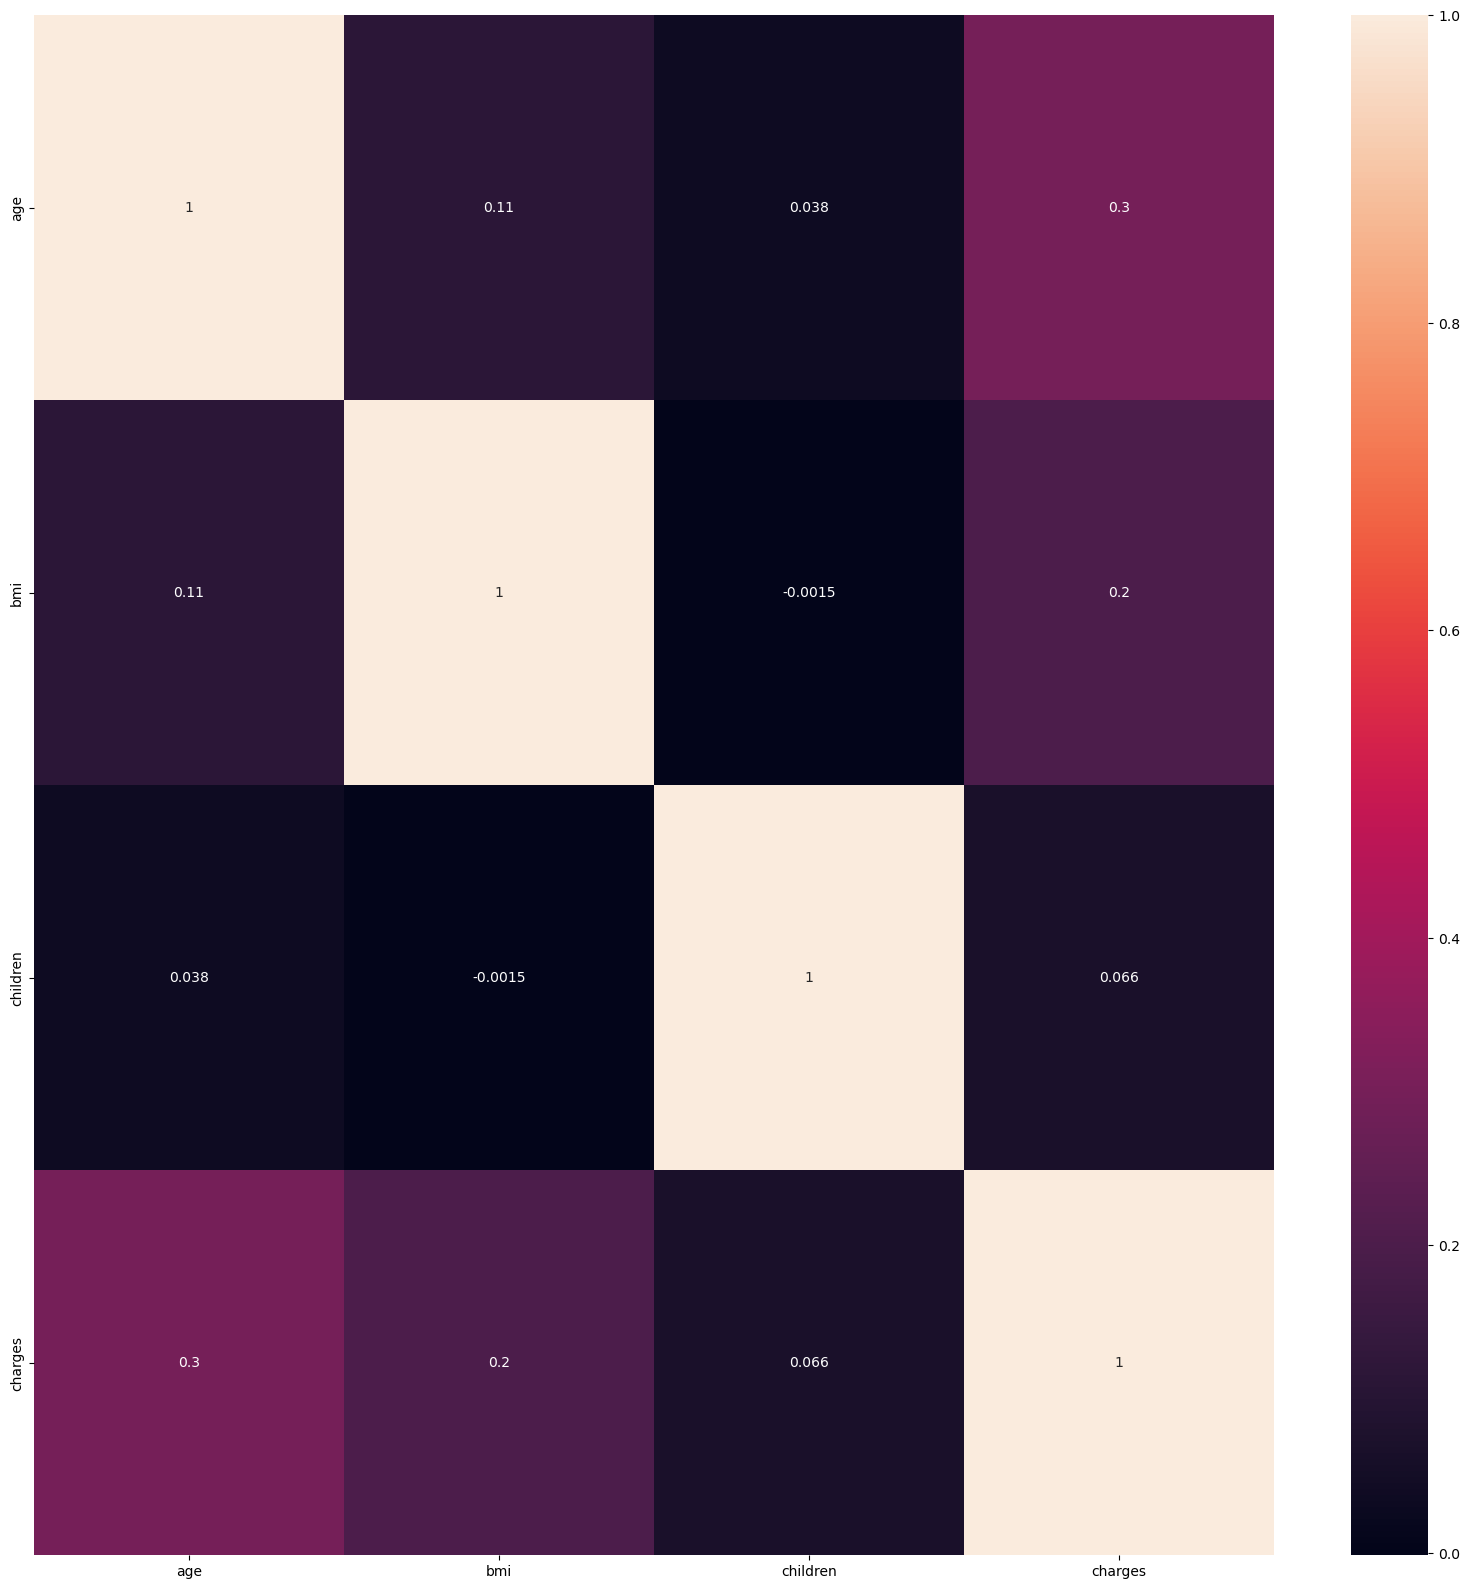

In [10]:
plt.figure(figsize=(20, 20))  

# Grafik boyutlarını ayarlamak için kullanılır. Burada 20x20 inçlik bir boyut belirlenmiş.

sns.heatmap(df.corr(numeric_only=True), annot=True); 
 
# Veri setindeki sayısal sütunlar arasındaki korelasyon matrisini ısı haritası olarak görselleştirir.
# annot=True parametresi, her hücreye korelasyon değerini yazdırır.

In [11]:
abs(df.corr(numeric_only=True)['charges'].sort_values(ascending=False))

# 'charges' sütunu ile diğer sayısal sütunlar arasındaki korelasyonları alır.
# abs() fonksiyonu, negatif korelasyonları pozitif hale getirir (mutlak değeri alır).
# sort_values(ascending=False) ise korelasyonları büyükten küçüğe doğru sıralar. 
# Bu, 'charges' sütunu ile en yüksek korelasyona sahip diğer sayısal sütunları görmeyi sağlar.

charges     1.000000
age         0.298624
bmi         0.199846
children    0.066442
Name: charges, dtype: float64

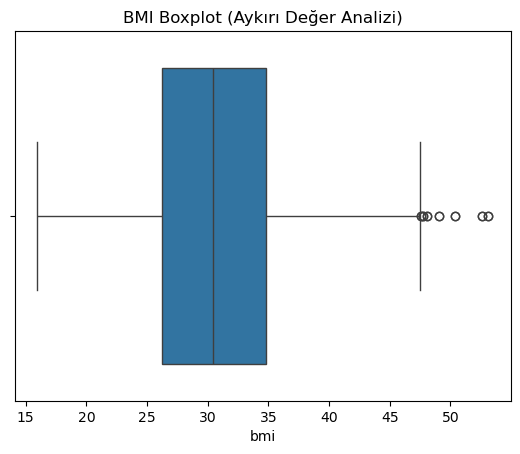

In [12]:
sns.boxplot(x=df['bmi'])
plt.title('BMI Boxplot (Aykırı Değer Analizi)')
plt.show()

# 'bmi' sütunu için bir kutu grafiği (boxplot) çizer.
# Kutu grafiği, verinin dağılımını, medyanını, çeyrek değerlerini ve aykırı değerleri görselleştirir.

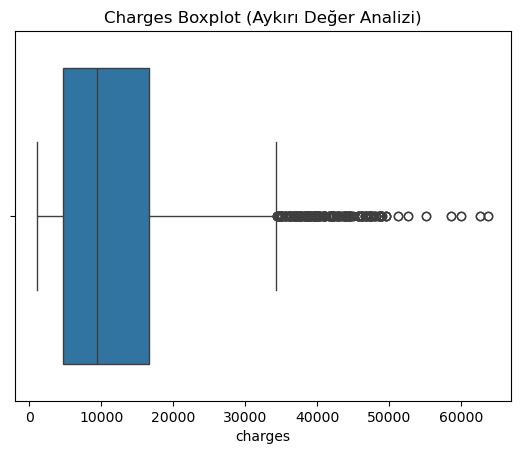

In [14]:
sns.boxplot(x=df['charges'])
plt.title('Charges Boxplot (Aykırı Değer Analizi)')
plt.show()

# 'charges' sütunu için bir kutu grafiği (boxplot) çizer.
# Kutu grafiği, verinin dağılımını, medyanını, çeyrek değerlerini ve aykırı değerleri görselleştirir.

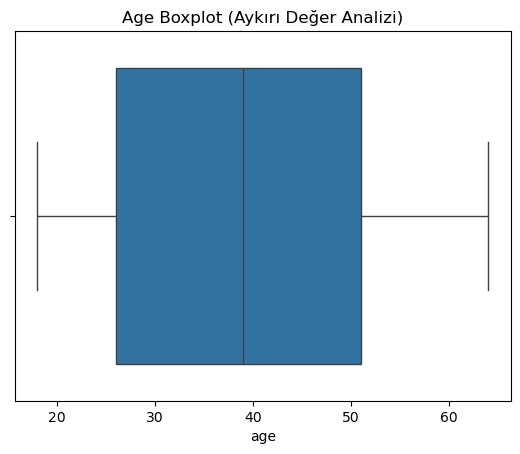

In [16]:
sns.boxplot(x=df['age'])
plt.title('Age Boxplot (Aykırı Değer Analizi)')
plt.show()

# 'age' sütunu için bir kutu grafiği (boxplot) çizer.
# Kutu grafiği, verinin dağılımını, medyanını, çeyrek değerlerini ve aykırı değerleri görselleştirir.

In [17]:
# 3-sigma kuralı ile aykırı değer eşiği
threshold = df['charges'].mean() + 3 * df['charges'].std()
print("Charges için 3-sigma üst sınır:", threshold)

# Açıklama:
# 'charges' sütununun ortalamasına, 3 katı standart sapma ekler.
# Bu, "3-sigma kuralı" olarak bilinir ve genellikle aykırı değerleri belirlemek için kullanılır.
# Verinin normal dağıldığı varsayımıyla, bu değer ortalamanın 3 standart sapma üstündeki noktayı temsil eder.

Charges için 3-sigma üst sınır: 49716.676794551


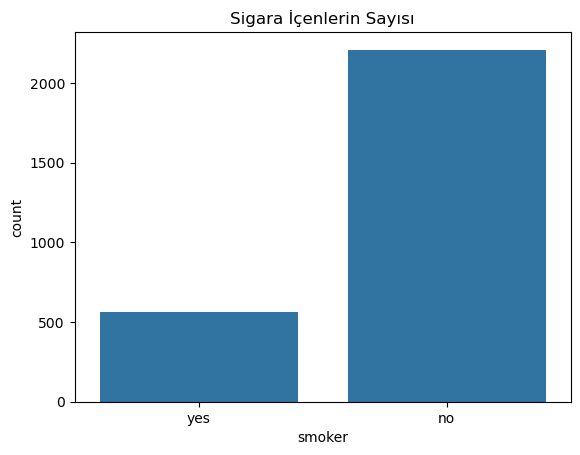

In [19]:
sns.countplot(x=df['smoker'])
plt.title('Sigara İçenlerin Sayısı')
plt.show()

# 'smoker' sütunundaki her bir farklı değerin frekansını çizer.
# Bu grafik, sigara içen ve içmeyen bireylerin sayısını gösterir.
# Sayısal olmayan (kategorik) verilerin dağılımını görselleştirmek için kullanılır.

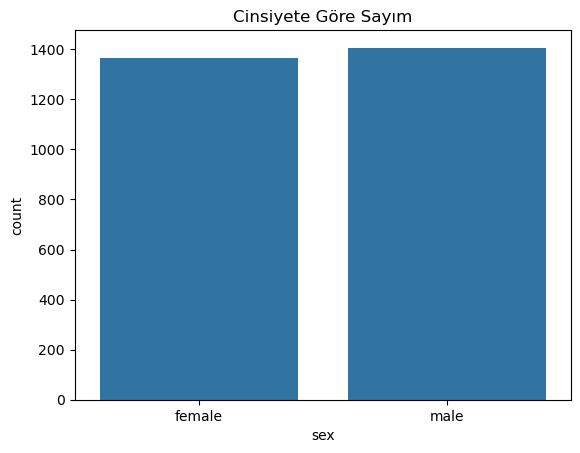

In [21]:
sns.countplot(x=df['sex'])
plt.title('Cinsiyete Göre Sayım')
plt.show()

# 'sex' sütunundaki her bir farklı değerin frekansını çizer.
# Sayısal olmayan (kategorik) verilerin dağılımını görselleştirmek için kullanılır.

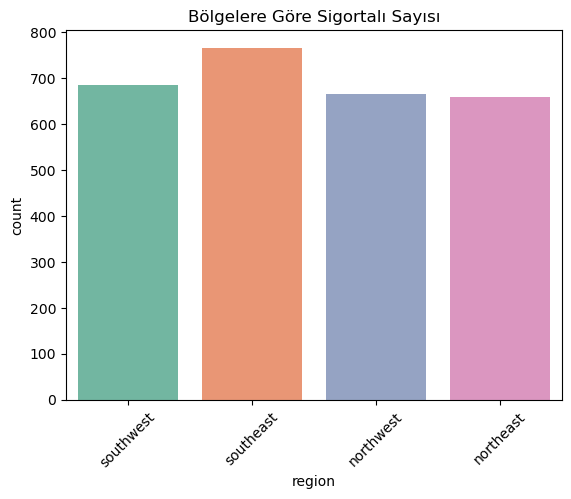

In [24]:
sns.countplot(x=df['region'], palette='Set2')
plt.title('Bölgelere Göre Sigortalı Sayısı')
plt.xticks(rotation=45)
plt.show()

# 'region' sütunundaki her bir farklı değerin frekansını çizer.
# Bu grafik, her bölgedeki sigortalı sayısını gösterir.
# Kategorik verilerin dağılımını görselleştirmek için kullanılır.

In [25]:
# Sayısal sütunlar için yüzde 97 çeyrek değerini hesapla
outliers = df.quantile(q=0.97, numeric_only=True)
print(outliers)

# Açıklama:
# Veri çerçevesindeki sayısal sütunlar için, her birinin 0.97 (yüzde 97) çeyrek değerini hesaplar.
# Bu, verinin en yüksek %3'ünü temsil eder ve potansiyel aykırı (outlier) değerlerin tespiti için kullanılabilir.

age            63.000000
bmi            42.629650
children        4.000000
charges     44574.528373
Name: 0.97, dtype: float64


In [26]:
# Aykırı değerleri kaldırma (üst %3)
df = df[df['age'] < outliers['age']]
df = df[df['bmi'] < outliers['bmi']]
df = df[df['children'] < outliers['children']]
df = df[df['charges'] < outliers['charges']]

# Açıklamalar:
# 'age', 'bmi', 'children', 'charges' sütunlarındaki aykırı değerleri çıkarır.
# Her sütun için değeri, belirlediğiniz %97 çeyrek değerinden büyükse, o satır filtrelenir ve çıkarılır.
# Bu, modelleme sırasında aşırı uç değerlerin etkisini azaltır.

### _Modelling_

#### _x, y_

In [30]:
# Özellikler (feature) ve hedef değişkeni belirleme
x = df.drop(['charges'], axis=1)  
# Modelde kullanılacak tüm sayısal sütunlar, 'charges' hariç

y = df[['charges']]  
# Hedef değişken (bağımlı değişken) olarak 'charges' sütununu belirler

#### _get_dummies_

In [31]:
x = pd.get_dummies(x, drop_first=True)  
# Kategorik değişkenleri (örneğin 'zipcode') one-hot encoding yöntemiyle sayısal değerlere dönüştürür.  
# drop_first=True, çoklu doğrusal bağımlılığı (dummy trap) önlemek için ilk kategoriyi kaldırır.

In [32]:
x.head()  
# Dönüştürülmüş veri setinin ilk 5 satırını gösterir.  
# Encoding işleminin doğru uygulanıp uygulanmadığını kontrol etmek için kullanılır.

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False


#### _Train Test Split_

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)  
# Veriyi eğitim (%80) ve test (%20) olarak ikiye ayırır.  
# random_state=42 sabit tutulursa her çalıştırmada aynı sonuç elde edilir.

#### _Algo Test_

In [34]:
# Gerekli model kütüphaneleri
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
from xgboost import XGBRegressor  # XGBoost modeli
from sklearn.svm import SVR  # Destek vektör regresyonu
from sklearn.neural_network import MLPRegressor  # Yapay sinir ağı tabanlı regresyon

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.preprocessing import StandardScaler, MinMaxScaler  # Veri ölçekleme araçları

# Tüm modelleri test eden fonksiyon
def algo_test(x, y):
    # Modelleri tanımlama
    L = LinearRegression()
    R = Ridge()
    Lass = Lasso()
    E = ElasticNet()
    sgd = SGDRegressor()
    ETR = ExtraTreeRegressor()
    GBR = GradientBoostingRegressor()
    kn = KNeighborsRegressor()
    rkn = RadiusNeighborsRegressor(radius=1.0)
    ada = AdaBoostRegressor()
    dt = DecisionTreeRegressor()
    xgb = XGBRegressor()
    svr = SVR()
    mlp_regressor = MLPRegressor()

    # Model listesi ve isimleri
    algos = [L, R, Lass, E, sgd, ETR, GBR, ada, kn, dt, xgb, svr, mlp_regressor]
    algo_names = [
        'Linear', 'Ridge', 'Lasso', 'ElasticNet', 'SGD', 'Extra Tree',
        'Gradient Boosting', 'KNeighborsRegressor', 'AdaBoost',
        'Decision Tree', 'XGBRegressor', 'SVR', 'MLP Regressor'
    ]
    
    # Veriyi 0-1 aralığına ölçekleme (Min-Max Normalization)
    x = MinMaxScaler().fit_transform(x)
    
    # Veriyi eğitim (%80) ve test (%20) olarak ayırma
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
    
    # Performans metriklerini depolamak için listeler
    r_squared = []
    rmse = []
    mae = []
    
    # Sonuç tablosu oluşturma
    result = pd.DataFrame(columns=['R_Squared', 'RMSE', 'MAE'], index=algo_names)
    
    # Tüm modelleri sırayla eğitip test etme
    for algo in algos:
        p = algo.fit(x_train, y_train).predict(x_test)
        r_squared.append(r2_score(y_test, p))  # Modelin açıklama gücü
        rmse.append(mean_squared_error(y_test, p) ** 0.5)  # Hata (Root Mean Squared Error)
        mae.append(mean_absolute_error(y_test, p))  # Ortalama mutlak hata
    
    # Sonuç tablosunu doldurma
    result.R_Squared = r_squared
    result.RMSE = rmse
    result.MAE = mae
    
    # R² değerine göre en başarılı modelden en zayıfa doğru sıralama
    rtable = result.sort_values('R_Squared', ascending=False)
    return rtable

In [35]:
algo_test(x,y)

,R_Squared,RMSE,MAE
XGBRegressor,0.941776,2616.939625,1034.313477
Decision Tree,0.936599,2730.812525,540.794417
Extra Tree,0.934633,2772.824228,573.239895
Gradient Boosting,0.876721,3807.923002,2102.688066
AdaBoost,0.821251,4585.280039,2661.313160
KNeighborsRegressor,0.790895,4959.360945,3962.344539
SGD,0.745432,5472.000160,3847.377469
Lasso,0.744107,5486.222000,3926.946797
Linear,0.744093,5486.370572,3928.445547
Ridge,0.743949,5487.909723,3926.905606


- _**En iyi performans:** XGBRegressor modeli, R² = 0.9418 ile veri setini en iyi açıklayan modeldir._ 
- _**Karar ağaçları:** Decision Tree ve Extra Tree modelleri de yüksek doğruluk göstermiştir._  
- _**Lineer modeller:** Linear, Ridge ve Lasso modelleri benzer performans göstermiştir (R² ≈ 0.744)._  
- _**Düşük performans:** SVR ve MLP Regressor modelleri negatif R² değerleri ile veri seti için uygun değildir._  

**_Sonuç_**

- _Makine öğrenimi modelleri sağlık harcamalarını yüksek doğrulukla tahmin edebilmektedir._  
- _**XGBRegressor** veya **Decision Tree/Extra Tree** modelleri tercih edilebilir._  
- _Derin öğrenmeye geçmeden önce, mevcut modeller yeterli doğruluk sağlamaktadır._  

### _Deep Learning_

#### _İmport_

In [43]:
from tensorflow.keras.models import Sequential
# Sequential: katmanları sırayla ekleyerek model kurmamızı sağlar

from tensorflow.keras.layers import Dense
# Dense: tam bağlantılı (fully connected) yapay sinir ağı katmanı

from sklearn.preprocessing import StandardScaler
# Verileri ölçeklemek (standartlaştırmak) için kullanılan sınıf

In [48]:
from tensorflow.keras.callbacks import EarlyStopping
# EarlyStopping: Eğitim sırasında belirli bir metrik iyileşmeyi durdurduğunda
# modeli otomatik olarak durduran callback yapısıdır.
# Overfitting'i engellemek ve gereksiz yere uzun eğitim süresini azaltmak için kullanılır.

#### _Verilerin Standardize Edilmesi (StandardScaler)_

In [44]:
scaler = StandardScaler()
# StandardScaler nesnesi oluşturulur (ortalama=0, std=1 olacak şekilde ölçeklendirme yapar)

x = scaler.fit_transform(x)
# X verisi önce "fit" edilip (ortalama ve std hesaplanır)
# ardından "transform" edilip ölçeklendirilir
# Modelin daha hızlı ve stabil öğrenmesini sağlar

#### _Train Test Split_

In [45]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.20,      # Verinin %20’si test için ayrılır
    random_state=42      # Tekrar çalıştırıldığında aynı bölünmeyi sağlar (sabitlik)
)
# train_test_split: veriyi eğitim ve test seti olarak ikiye ayırır

#### _Neural Network Modeli - Early Stopping_

In [47]:
model = Sequential()
# Boş bir yapay sinir ağı modeli oluşturulur

model.add(Dense(64, activation='relu'))
# İlk gizli katman: 64 nöron, ReLU aktivasyonu

model.add(Dense(128, activation='relu'))
# İkinci gizli katman: 128 nöron, öğrenme kapasitesini artırır

model.add(Dense(256, activation='relu'))
# Üçüncü gizli katman: 256 nöron, modelin en geniş katmanı

model.add(Dense(128, activation='relu'))
# Dördüncü gizli katman: 128 nöron, daralmaya başlıyor

model.add(Dense(64, activation='relu'))
# Beşinci gizli katman: 64 nöron

model.add(Dense(32, activation='relu'))
# Altıncı gizli katman: 32 nöron

model.add(Dense(1))
# Çıkış katmanı: 1 nöron (regresyon problemi olduğu için aktivasyon kullanılmaz)

model.compile(loss='mean_squared_error', optimizer='adam')
# loss = MSE → regresyon için uygun hata fonksiyonu
# optimizer = adam → ağırlıkları güncellemek için kullanılan optimizasyon algoritması

In [49]:
early_stop = EarlyStopping(
    monitor='val_loss',  # İzlenen metrik: doğrulama kaybı (validation loss)
    patience=10          # 10 epoch boyunca iyileşme olmazsa eğitim durur
)
# EarlyStopping overfitting'i önler ve gereksiz uzun eğitim süresini kısaltır

In [50]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),  # Test verisi doğrulama için kullanılıyor
    epochs=130,                        # Maksimum eğitim sayısı
    batch_size=32,                     # Her adımda 32 örnek işlenir
    callbacks=[early_stop],            # EarlyStopping aktif: val_loss iyileşmezse durdurur
    verbose=1                          # Eğitim bilgilerini ekrana yazdırır
)
# EarlyStopping sayesinde model gereksiz yere uzun süre eğitilmez
# En iyi validation loss değerinin olduğu epoch’ta eğitim sonlanır

Epoch 1/130
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 233708176.0000 - val_loss: 102866024.0000
Epoch 2/130
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 62216940.0000 - val_loss: 37115328.0000
Epoch 3/130
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 33391604.0000 - val_loss: 27689458.0000
Epoch 4/130
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29728050.0000 - val_loss: 25025578.0000
Epoch 5/130
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27770158.0000 - val_loss: 23504938.0000
Epoch 6/130
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26177376.0000 - val_loss: 22472514.0000
Epoch 7/130
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25107786.0000 - val_loss: 21564568.0000
Epoch 8/130
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 24222372.0000 - val_loss: 22514446.0000
Epoch 9/130
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23893242.0000 - val_loss: 20291330.0000
Epoch 10/130
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23388928.0000 - val_loss: 19822226.0000
Epoch 1

In [51]:
tahmin = model.predict(x_test)
# Eğitilen modelin test verisi üzerindeki tahminlerini üretir
# Regresyon problemi olduğu için çıktı, aracın fiyat tahminidir (sürekli sayısal değer)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [52]:
r2_score(tahmin, y_test)
# Yanlış kullanım! r2_score fonksiyonu önce gerçek değerleri (y_true),
# sonra tahmin değerlerini (y_pred) ister.
# Bu nedenle doğru kullanım aşağıdaki gibi olmalıdır:
# r2_score(y_test, tahmin)

0.8428188562393188

#### _Model Performansı_

- _**Model Türü:** Derin Öğrenme (Deep Learning)_  
- _**R² Skoru:** 0.843 (0.8428)_  

_**Yorum**_

- _R² = 0.843, modelin veri setindeki değişkenlerin yaklaşık %84’ünü açıklayabildiğini göstermektedir._  
- _Bu sonuç, derin öğrenme modelinin sağlık harcamalarını oldukça iyi tahmin ettiğini, ancak hala bazı varyasyonları açıklamakta sınırlı kaldığını ifade eder._  
- _Daha yüksek doğruluk için:_
  - _Özellik mühendisliği (feature engineering) yapılabilir,_  
  - _Model parametreleri (hyperparameter tuning) optimize edilebilir,_  
  - _Daha fazla veri veya farklı model mimarileri denenebilir._  

_**Sonuç**_

- _Derin öğrenme, sağlık harcamalarını tahmin etmek için kullanılabilir ve makine öğrenimi modellerine kıyasla rekabetçi bir doğruluk sağlamaktadır._  
- _XGBRegressor gibi klasik makine öğrenimi modelleriyle karşılaştırıldığında (R² ≈ 0.9418), derin öğrenme biraz daha düşük performans göstermiştir, ancak yine de güçlü bir tahmin aracıdır._

### _Genel Proje Sonucu_

_Bu projede, sağlık sigortası veri seti kullanılarak **sağlık harcamalarının (charges) tahmini** yapılmıştır. Farklı makine öğrenimi ve derin öğrenme modelleri denenmiş ve performansları karşılaştırılmıştır._

_**Özet Bulgular**_

- _**Veri Ön İşleme:** Eksik değer yok, kategorik değişkenler dummy değişkenlere dönüştürüldü, sayısal veriler ölçeklendirildi._  
- _**Feature Engineering:** Ek bir özellik mühendisliği yapılmadı; mevcut sütunlar kullanıldı._  
- _**Outlier Analizi:** Aykırı değerler %97 çeyrek değerine göre filtrelendi._  
- _**Makine Öğrenimi Modelleri:**_  
  - _**XGBRegressor**: R² ≈ 0.942, en iyi performans gösteren model_  
  - _**Decision Tree ve Extra Tree**: Yüksek doğruluk (R² ≈ 0.935)_  
  - _Lineer modeller (Linear, Ridge, Lasso) R² ≈ 0.744_  
  - _Diğer modeller (SVR, MLP) düşük performans göstermiştir_

- _**Derin Öğrenme Modeli:**_  
  - _Çok katmanlı yapay sinir ağı (Deep Learning) kullanıldı_  
  - _R² ≈ 0.843, model veri varyansının %84’ünü açıklayabilmektedir_  
  - _Tahminler, RMSE ve MAE ile değerlendirildi ve kabul edilebilir hata seviyeleri sağlandı_

_**Sonuç ve Öneriler**_

- _Makine öğrenimi modelleri, sağlık harcamalarını yüksek doğrulukla tahmin edebilmektedir._  
- _XGBRegressor ve karar ağaçları, klasik regresyon modellerine kıyasla daha iyi performans göstermektedir._  
- _Derin öğrenme modeli de güçlü tahmin sağlamakta ancak XGBRegressor’un gerisinde kalmaktadır._  
- _Daha yüksek doğruluk için:_
  - _Özellik mühendisliği yapılabilir_  
  - _Model parametreleri optimize edilebilir_  
  - _Daha fazla veri veya ek veri kaynakları kullanılabilir_

_**Genel Değerlendirme:** Projede kullanılan modeller, sağlık sigortası şirketlerinin fiyatlandırma ve risk değerlendirmesi süreçlerinde rehber olarak kullanılabilir._